Name:- Apporva Krishna.

Batch:- DS22OCT7

Implementation of ML Algorithm on heart_disease_dataset

EDA and Feature Engineering

1) Data Cleaning

2) Graphical Analysis

3) Outliers Detection

4) Removal of Outliers

Algorithms

1) Logistic Regression, Accuracy got - 82.60%

2) Support Vector Classifier, Accuracy got - 80.43%

3) Decision Tree, Accuracy got - 69.56%

4) Random Forest, Accuracy got - 80.43%

5) Bagging Classifier, Accuracy got - 76.08%

6) Adaboost Classifier, Accuracy got - 76.08%

7) Gradient Boosting Classfier, Accuracy got - 80.43%

8) XGBoost Classifier, Accuracy got - 76.08%

Importing the Libraries for Data Cleaning , Preprocessing , Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

 Importing the dataset

In [2]:
df=pd.read_csv("h.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Checking the null values

In [4]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We have zero null values in our dataset

Statistical Analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:>

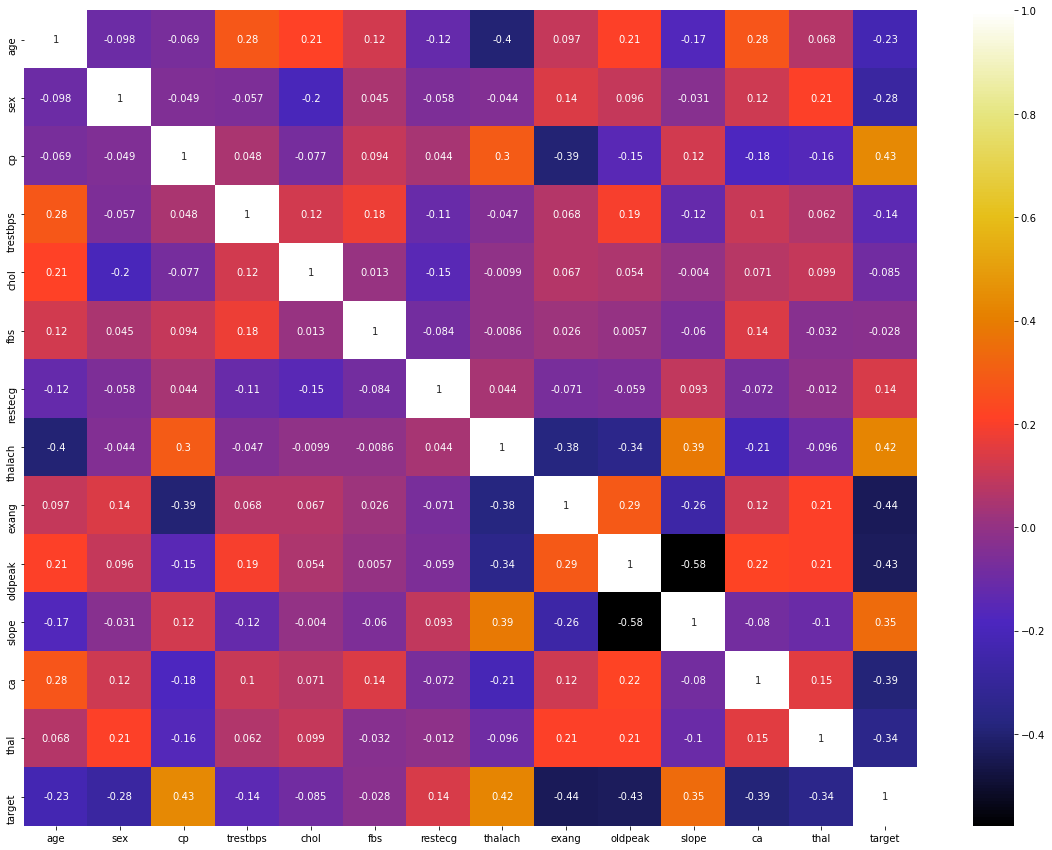

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap="CMRmap",annot=True)

In [7]:
df.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139,-1.021343
sex,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930,-0.065307
cp,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201,0.223330
trestbps,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022,-1.267950
chol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488,-2.203855
fbs,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983,-0.004983
restecg,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858,0.035998
thalach,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491,4.818766
exang,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472,-0.102354
oldpeak,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462,-0.249452


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Checking the distribution of the features

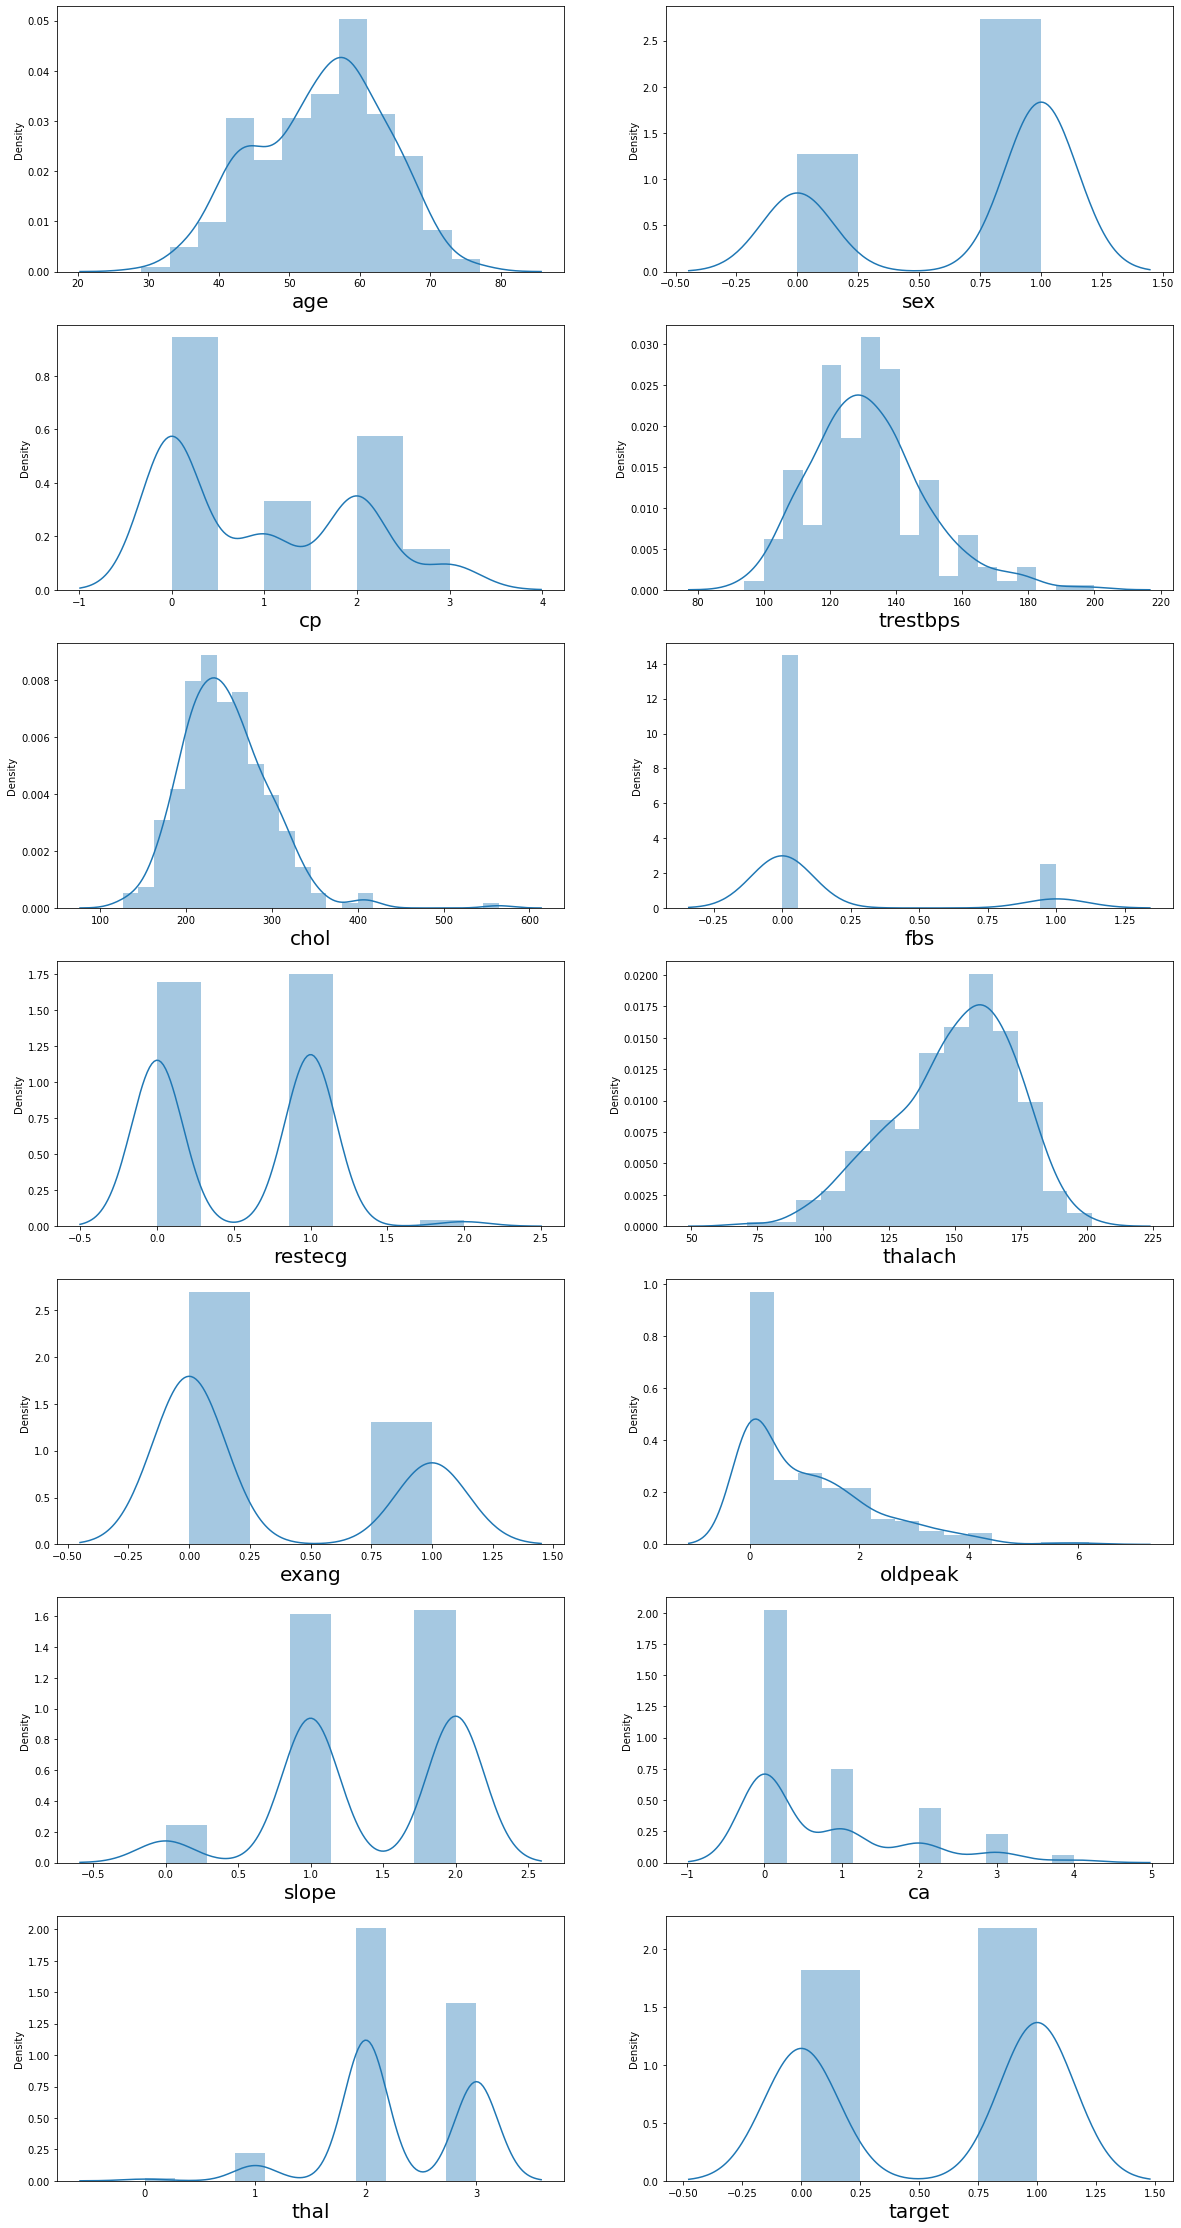

In [9]:
plt.figure(figsize=(20,40),facecolor='White')
pltnumber=1
for column  in df:
    if pltnumber<15:
     ax=plt.subplot(7,2,pltnumber)
     sns.distplot(df[column])
     plt.xlabel(column,fontsize=20)
     pltnumber+=1  
plt.show()
    

Here we can see some outliers in some features

Outliers Detection and Removal Approaches

Identifying outliers with visualization

Z-score method

Interquartile Range Method( IQR ) method

Compare Skewness

Z-score:

The number of standard deviations away from the mean that a particular observation is.

A negative Z-score means an observation is below the mean.

while a positive Z-score means means it above the mean.

The further away from 0 the Z-Score is, the further away from the mean your observation is.

Function to detect outliers

In [10]:
def outlier_thresholds(dataframe,variable):
    quartile1=dataframe[variable].quantile(0.25)
    quartile3=dataframe[variable].quantile(0.75)
    interquartile_range=quartile3-quartile1
    up_limit=quartile3+1.5*interquartile_range
    low_limit=quartile1-1.5*interquartile_range
    return low_limit,up_limit



for i in df.columns:
    print("lower limit and upper limit of {} is {}".format(i,outlier_thresholds(df,i)))

lower limit and upper limit of age is (27.25, 81.25)
lower limit and upper limit of sex is (-1.5, 2.5)
lower limit and upper limit of cp is (-3.0, 5.0)
lower limit and upper limit of trestbps is (90.0, 170.0)
lower limit and upper limit of chol is (115.75, 369.75)
lower limit and upper limit of fbs is (0.0, 0.0)
lower limit and upper limit of restecg is (-1.5, 2.5)
lower limit and upper limit of thalach is (84.75, 214.75)
lower limit and upper limit of exang is (-1.5, 2.5)
lower limit and upper limit of oldpeak is (-2.4000000000000004, 4.0)
lower limit and upper limit of slope is (-0.5, 3.5)
lower limit and upper limit of ca is (-1.5, 2.5)
lower limit and upper limit of thal is (0.5, 4.5)
lower limit and upper limit of target is (-1.5, 2.5)


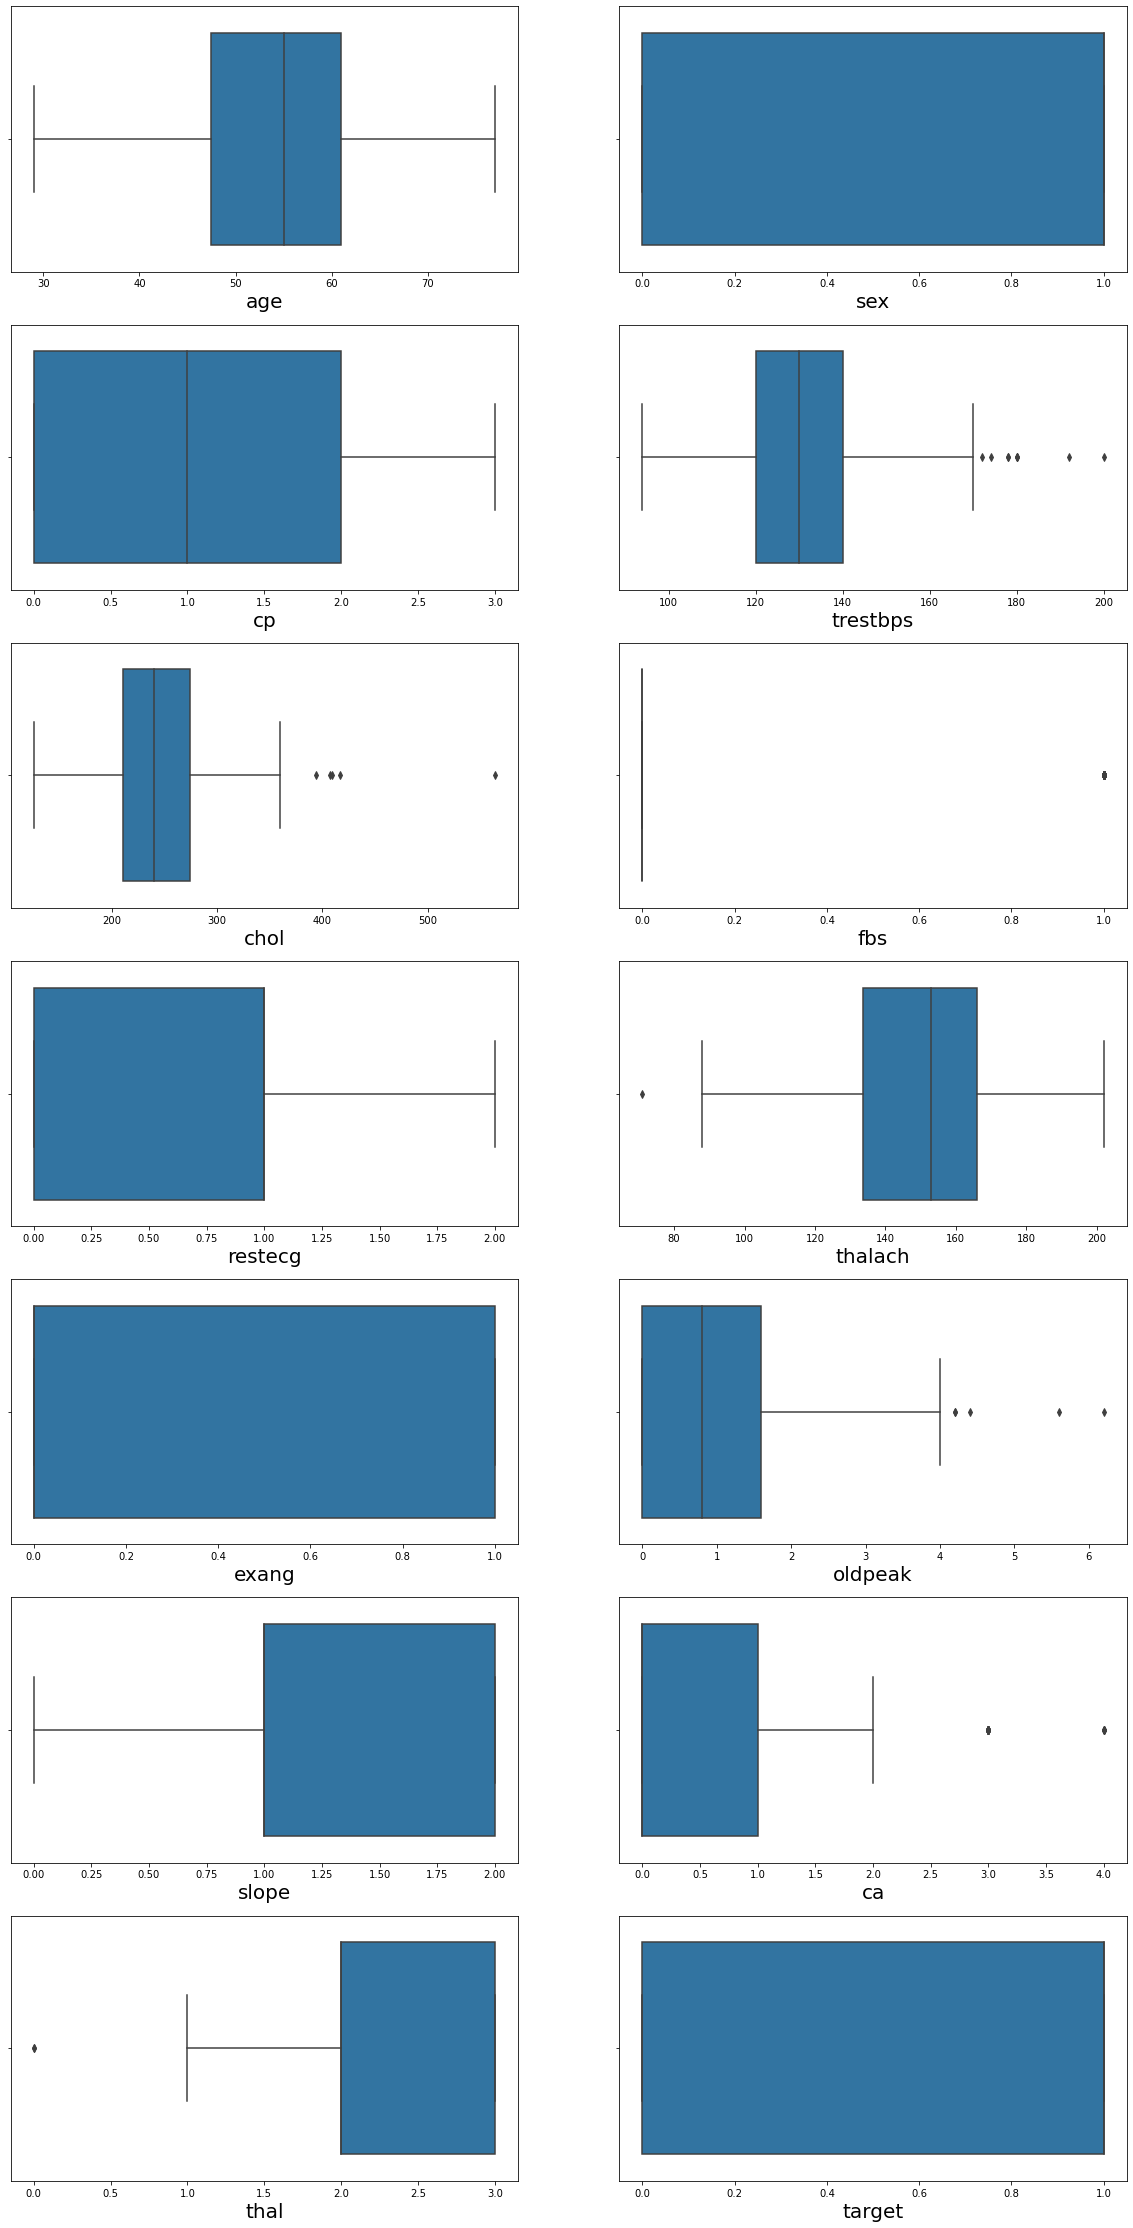

In [11]:
plt.figure(figsize=(20,40))
pltnumber=1

for column in df:
    if pltnumber<=14:
        ax=plt.subplot(7,2,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    pltnumber+=1
plt.show()    
    

So , we got outliers in trestbps,chol,fbs,thalach,oldpeak,ca,thal

function to remove outliers

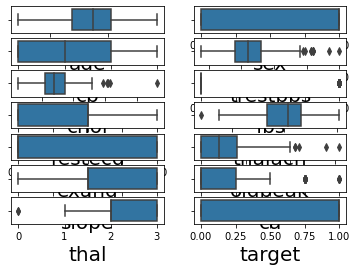

In [12]:
def replace_with_thresholds(dataframe,columns):
    for variable in column:
        low_limit,up_limit=outlier_thresholds(dataframe,variable)
        dataframe.loc[(dataframe[variable]<low_limit),variable]=low_limit
        dataframe.loc[(dataframe[variable]>up_limit),variable]=lup_limit
    replace_with_thresholds(df,df.column)
    plt.figure(figsize=(20,40))
pltnumber=1

for column in df:
    if pltnumber<=14:
        ax=plt.subplot(7,2,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    pltnumber+=1
plt.show() 
        
        

As we can see from above boxplots outliers are not removed properly

Interquartile Range Method( IQR ) method

In [13]:
df1=df.copy()
def remove_outliers_IQR(col):
    percentile25=df1[col].quantile(.25)
    percentile75=df1[col].quantile(.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr
    print("upper limit",upper_limit)
    print("lower limit",lower_limit)
    df1[col]=np.where(df1[col]>upper_limit,upper_limit,np.where(df1[col]<lower_limit, lower_limit,df1[col]))
    return df1[df1[col]>upper_limit]

remove_outliers_IQR('trestbps')

percentile25 120.0
percentile75 140.0
upper limit 170.0
lower limit 90.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [14]:
remove_outliers_IQR("chol")

percentile25 211.0
percentile75 274.5
upper limit 369.75
lower limit 115.75


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [15]:
remove_outliers_IQR("fbs")

percentile25 0.0
percentile75 0.0
upper limit 0.0
lower limit 0.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [16]:
remove_outliers_IQR("thalach")

percentile25 133.5
percentile75 166.0
upper limit 214.75
lower limit 84.75


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [17]:
remove_outliers_IQR("oldpeak")

percentile25 0.0
percentile75 1.6
upper limit 4.0
lower limit -2.4000000000000004


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [18]:
remove_outliers_IQR("ca")

percentile25 0.0
percentile75 1.0
upper limit 2.5
lower limit -1.5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [19]:
remove_outliers_IQR("thal")

percentile25 2.0
percentile75 3.0
upper limit 4.5
lower limit 0.5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Comparing

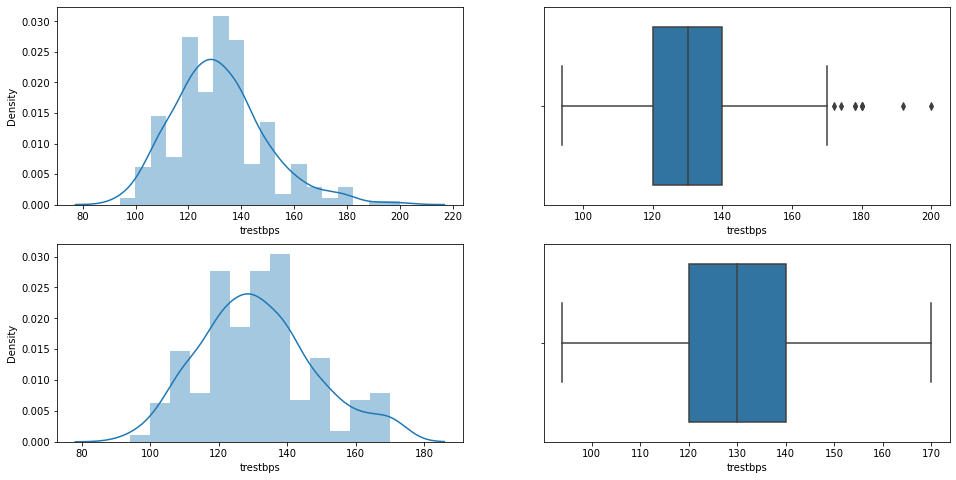

In [20]:
def create_comparision_plot(df,df1,column):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])
    
    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    
    plt.subplot(2,2,3)
    sns.distplot(df1[column])
    
    plt.subplot(2,2,4)
    sns.boxplot(df1[column])
    
    plt.show()
    
create_comparision_plot(df,df1,'trestbps')    

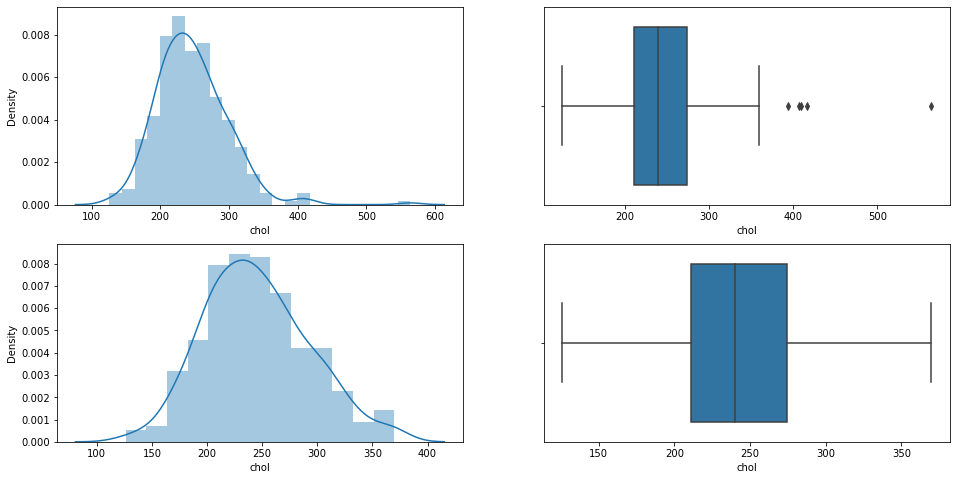

In [21]:
create_comparision_plot(df,df1,'chol')  

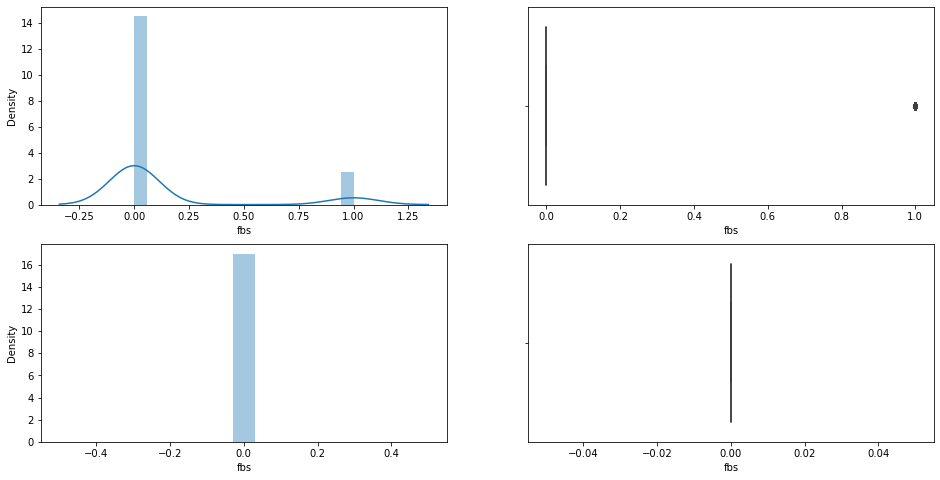

In [22]:
create_comparision_plot(df,df1,'fbs')  

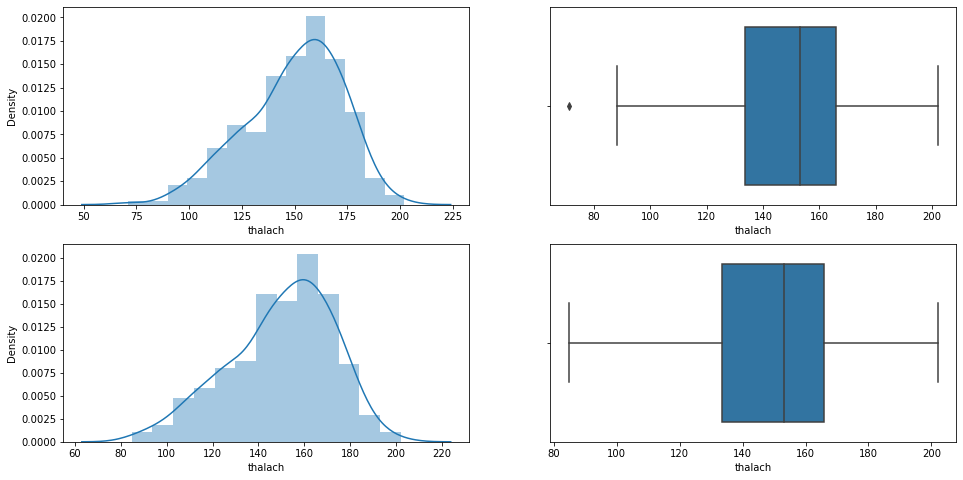

In [23]:
create_comparision_plot(df,df1,'thalach')  

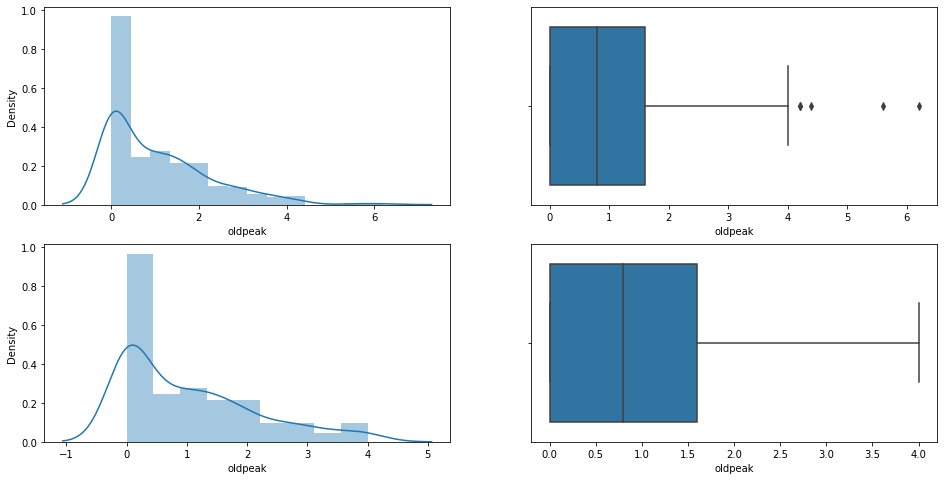

In [24]:
create_comparision_plot(df,df1,'oldpeak')  

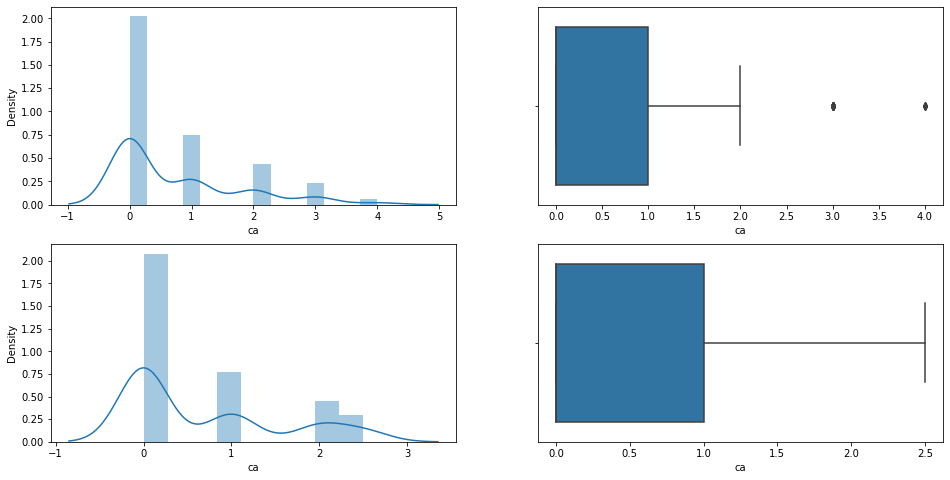

In [25]:
create_comparision_plot(df,df1,'ca')  

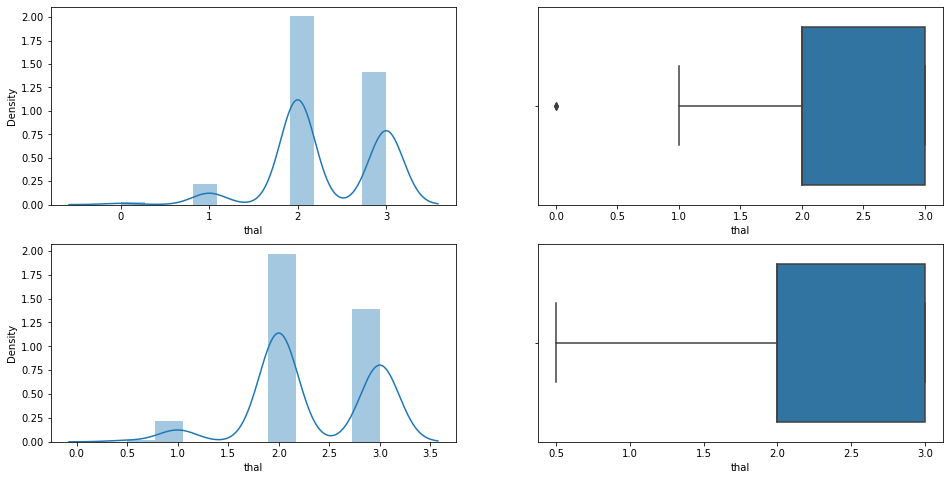

In [26]:
create_comparision_plot(df,df1,'thal')  

Compare skewness

In [27]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [28]:
df1.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.386367
chol        0.333267
fbs         0.000000
restecg     0.162522
thalach    -0.493392
exang       0.742532
oldpeak     0.997885
slope      -0.508316
ca          0.919045
thal       -0.323530
target     -0.179821
dtype: float64

Skewness is reduced after we have removed ouliers using IQR Method

Splitting the Dataset into dependent and independent features

In [29]:
x=df1.drop(columns=['target'])
y=df1['target']

In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [31]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0


Relationship between dependent and independent features

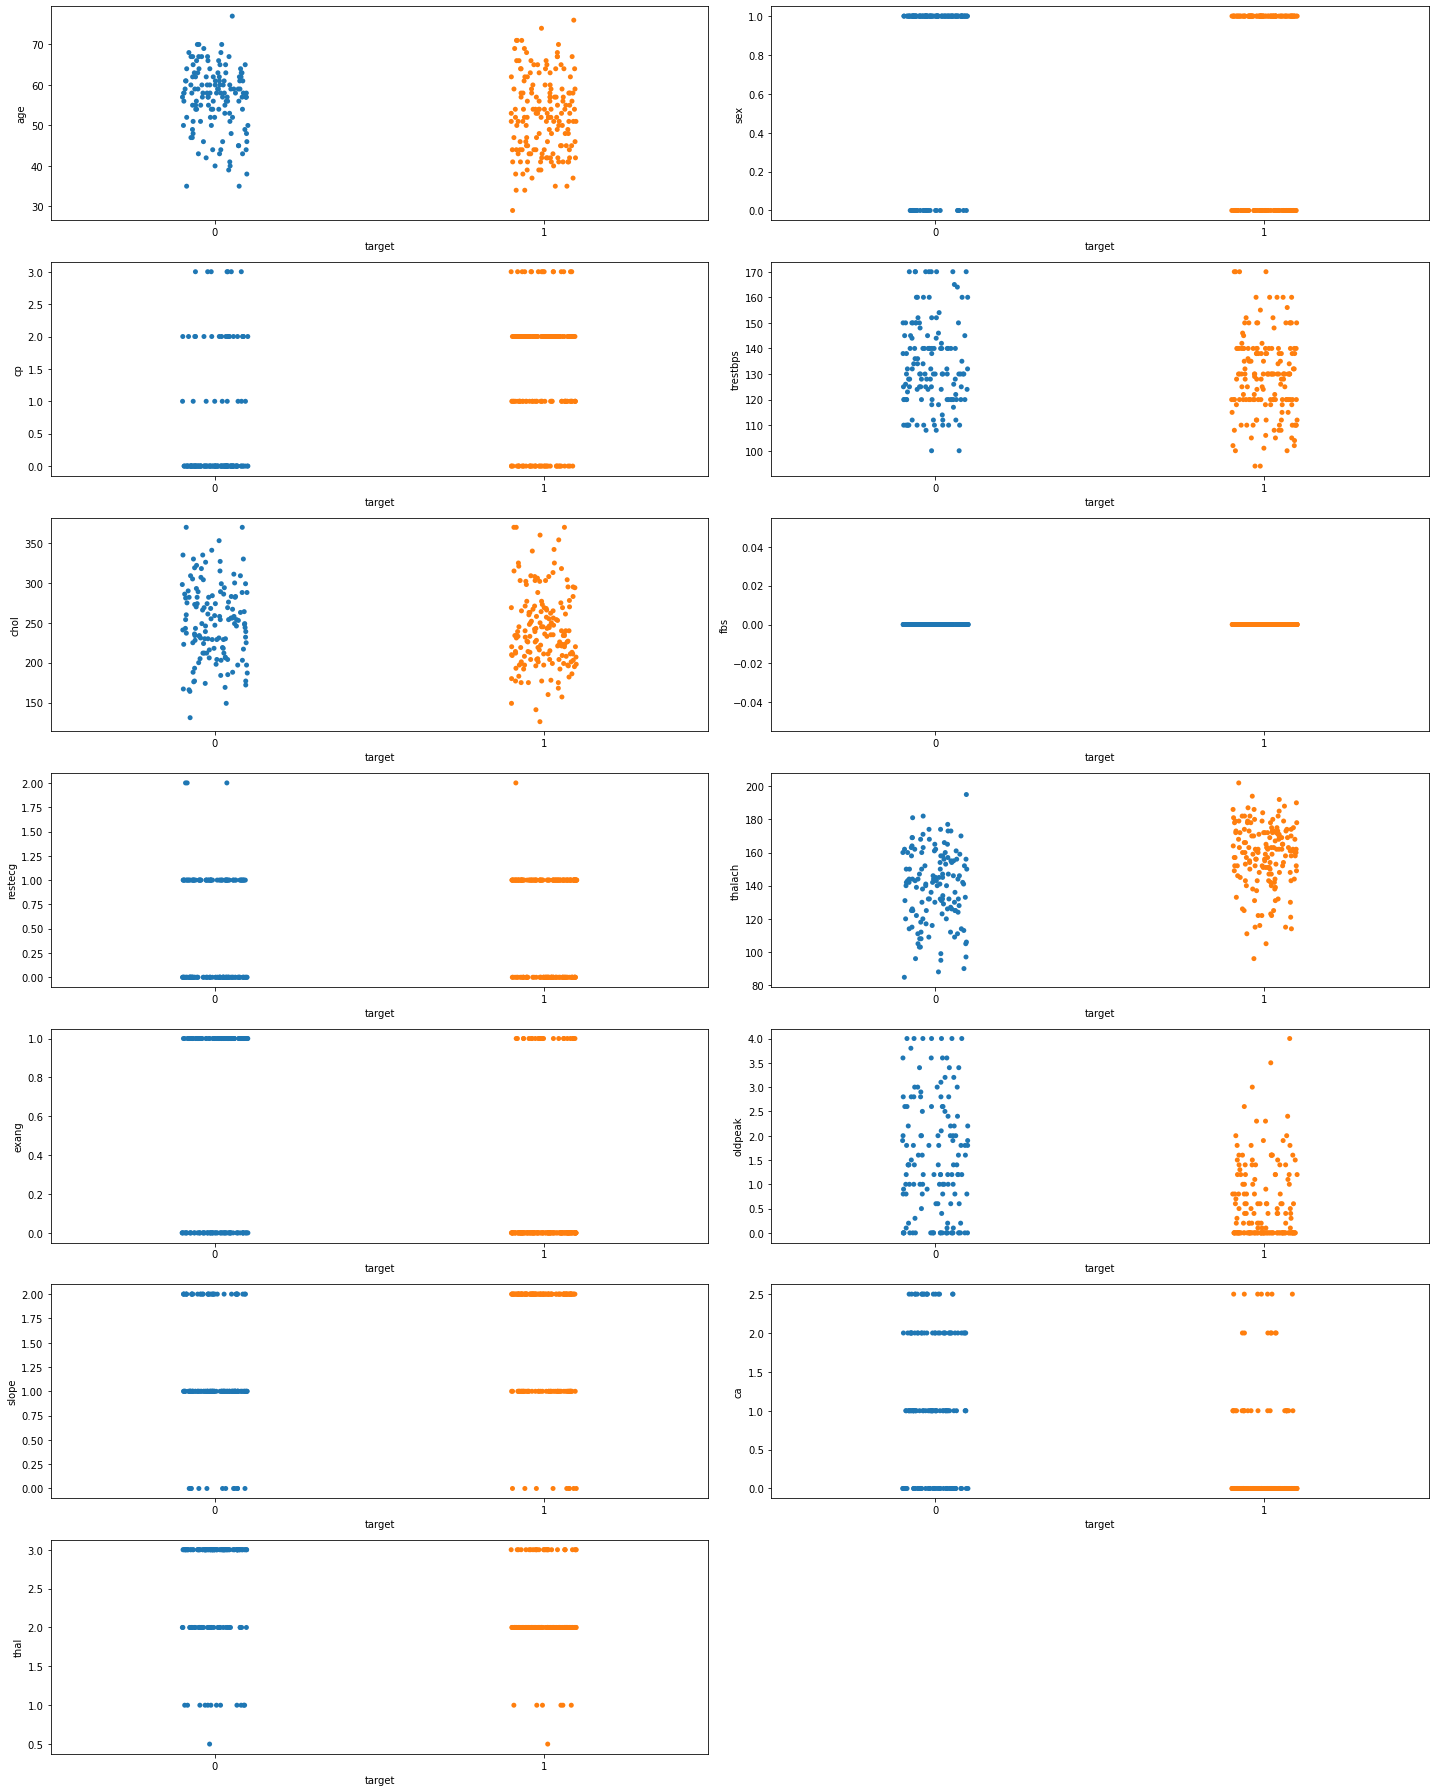

In [32]:
plt.figure(figsize=(20,25),facecolor='White')
plotnumber=1

for column in x:
    if plotnumber<14:
     ax=plt.subplot(7,2,plotnumber)
     sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()    
    

Graphical Analysis between dependent and independent features

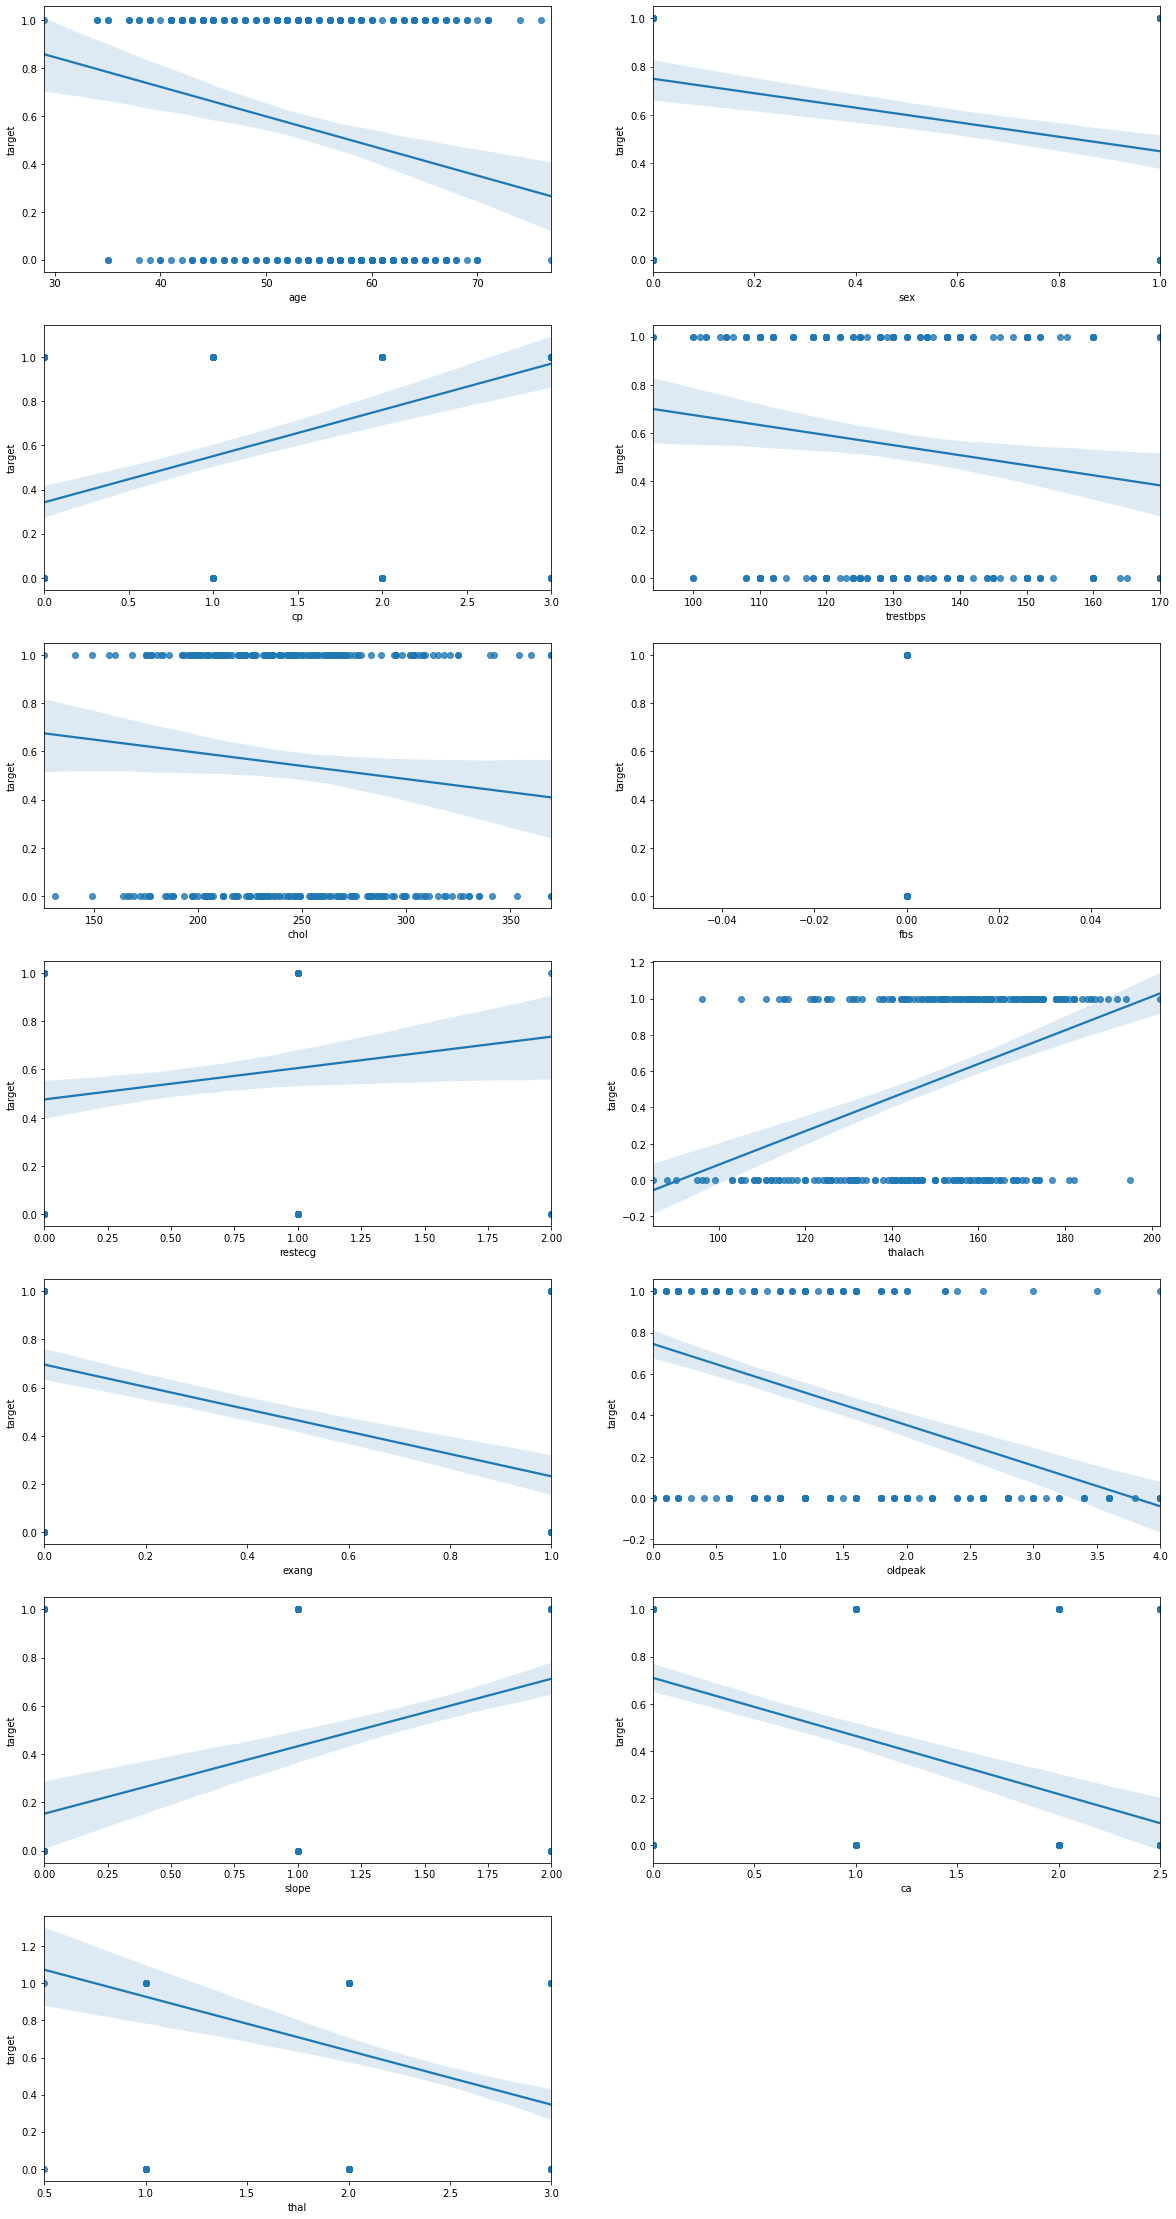

In [33]:
plt.figure(figsize=(20,40))
for i in enumerate(x.columns):
    plt.subplot(7,2,i[0]+1)
    sns.regplot(x=df1[i[1]],y=df1['target'])

Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,random_state=16)

In [35]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
220,63,0,0,150.0,369.75,0.0,0,154.0,0,4.0,1,2.5,3.0
179,57,1,0,150.0,276.00,0.0,0,112.0,1,0.6,1,1.0,1.0
135,49,0,0,130.0,269.00,0.0,1,163.0,0,0.0,2,0.0,2.0
64,58,1,2,140.0,211.00,0.0,0,165.0,0,0.0,2,0.0,2.0
276,58,1,0,146.0,218.00,0.0,1,105.0,0,2.0,1,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,54,0,2,108.0,267.00,0.0,0,167.0,0,0.0,2,0.0,2.0
69,62,0,0,124.0,209.00,0.0,1,163.0,0,0.0,2,0.0,2.0
121,59,1,0,138.0,271.00,0.0,0,182.0,0,0.0,2,0.0,2.0
238,77,1,0,125.0,304.00,0.0,0,162.0,1,0.0,2,2.5,2.0


In [36]:
y_train

220    0
179    0
135    1
64     1
276    0
      ..
123    1
69     1
121    1
238    0
169    0
Name: target, Length: 257, dtype: int64

In [37]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
59,57,0,0,128.0,303.00,0.0,0,159.0,0,0.0,2,1.0,2.0
282,59,1,2,126.0,218.00,0.0,1,134.0,0,2.2,1,1.0,1.0
183,58,1,2,112.0,230.00,0.0,0,165.0,0,2.5,1,1.0,3.0
0,63,1,3,145.0,233.00,0.0,0,150.0,0,2.3,0,0.0,1.0
262,53,1,0,123.0,282.00,0.0,1,95.0,1,2.0,1,2.0,3.0
126,47,1,0,112.0,204.00,0.0,1,143.0,0,0.1,2,0.0,2.0
289,55,0,0,128.0,205.00,0.0,2,130.0,1,2.0,1,1.0,3.0
240,70,1,2,160.0,269.00,0.0,1,112.0,1,2.9,1,1.0,3.0
237,60,1,0,140.0,293.00,0.0,0,170.0,0,1.2,1,2.0,3.0
173,58,1,2,132.0,224.00,0.0,0,173.0,0,3.2,2,2.0,3.0


In [38]:
y_test

59     1
282    0
183    0
0      1
262    0
126    1
289    0
240    0
237    0
173    0
83     1
191    0
222    0
30     1
182    0
12     1
105    1
246    0
275    0
7      1
230    0
140    1
187    0
20     1
157    1
87     1
253    0
137    1
292    0
265    0
250    0
103    1
35     1
204    0
302    0
96     1
139    1
71     1
273    0
18     1
294    0
244    0
221    0
280    0
54     1
255    0
Name: target, dtype: int64

Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_train


array([[ 0.94139029, -1.44789003, -0.96097186, ..., -0.70591946,
         2.1056781 ,  1.18646406],
       [ 0.2904379 ,  0.69066019, -0.96097186, ..., -0.70591946,
         0.40391938, -2.25897395],
       [-0.57749862, -1.44789003, -0.96097186, ...,  0.95849615,
        -0.73058643, -0.53625494],
       ...,
       [ 0.50742203,  0.69066019, -0.96097186, ...,  0.95849615,
        -0.73058643, -0.53625494],
       [ 2.46027919,  0.69066019, -0.96097186, ...,  0.95849615,
         2.1056781 , -0.53625494],
       [-0.14353036,  0.69066019, -0.96097186, ..., -2.37033508,
        -0.73058643,  1.18646406]])

In [40]:
x_test=scalar.transform(x_test)
x_test

array([[ 2.90437901e-01, -1.44789003e+00, -9.60971864e-01,
        -2.26470782e-01,  1.23322668e+00,  0.00000000e+00,
        -1.01374047e+00,  4.01349267e-01, -6.78400525e-01,
        -9.03547319e-01,  9.58496152e-01,  4.03919384e-01,
        -5.36254944e-01],
       [ 5.07422030e-01,  6.90660187e-01,  9.76045933e-01,
        -3.47098742e-01, -5.65790788e-01,  0.00000000e+00,
         9.01930860e-01, -7.06207500e-01, -6.78400525e-01,
         1.13015353e+00, -7.05919463e-01,  4.03919384e-01,
        -2.25897395e+00],
       [ 3.98929965e-01,  6.90660187e-01,  9.76045933e-01,
        -1.19149447e+00, -3.11811851e-01,  0.00000000e+00,
        -1.01374047e+00,  6.67162891e-01, -6.78400525e-01,
         1.40747638e+00, -7.05919463e-01,  4.03919384e-01,
         1.18646406e+00],
       [ 9.41390288e-01,  6.90660187e-01,  1.94455483e+00,
         7.98866882e-01, -2.48317117e-01,  0.00000000e+00,
        -1.01374047e+00,  2.62883124e-03, -6.78400525e-01,
         1.22259448e+00, -2.37033508e

Logistic Regression Model Training

In [41]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
LogisticRegression()

LogisticRegression()

Prediction

In [42]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.8260869565217391


In [44]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.90      0.75      0.82        24

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.84      0.83      0.83        46



Support Vector Classification model
Fitting Kernel SVM to the Training set

In [45]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)
SVC(kernel='linear',random_state=0)

SVC(kernel='linear', random_state=0)

Predicting the Test set results

In [46]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [47]:
score=accuracy_score(y_pred,y_test)
score

0.8043478260869565

In [48]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.90      0.72      0.80        25

    accuracy                           0.80        46
   macro avg       0.82      0.81      0.80        46
weighted avg       0.82      0.80      0.80        46



Predicting the Test set results

In [49]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()
treemodel.fit(x_train,y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

[Text(592.875, 885.6150000000001, 'X[12] <= 0.325\ngini = 0.492\nsamples = 257\nvalue = [112, 145]'),
 Text(341.775, 808.6050000000001, 'X[11] <= -0.163\ngini = 0.359\nsamples = 162\nvalue = [38, 124]'),
 Text(209.25, 731.5950000000001, 'X[9] <= 1.685\ngini = 0.181\nsamples = 109\nvalue = [11, 98]'),
 Text(139.5, 654.585, 'X[0] <= 0.345\ngini = 0.142\nsamples = 104\nvalue = [8, 96]'),
 Text(83.69999999999999, 577.575, 'X[12] <= -2.69\ngini = 0.026\nsamples = 75\nvalue = [1, 74]'),
 Text(55.8, 500.5650000000001, 'X[7] <= -0.64\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(27.9, 423.55500000000006, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(83.69999999999999, 423.55500000000006, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.6, 500.5650000000001, 'gini = 0.0\nsamples = 73\nvalue = [0, 73]'),
 Text(195.29999999999998, 577.575, 'X[7] <= -2.639\ngini = 0.366\nsamples = 29\nvalue = [7, 22]'),
 Text(167.39999999999998, 500.5650000000001, 'gini = 0.0\nsamples = 1\nvalue = [1,

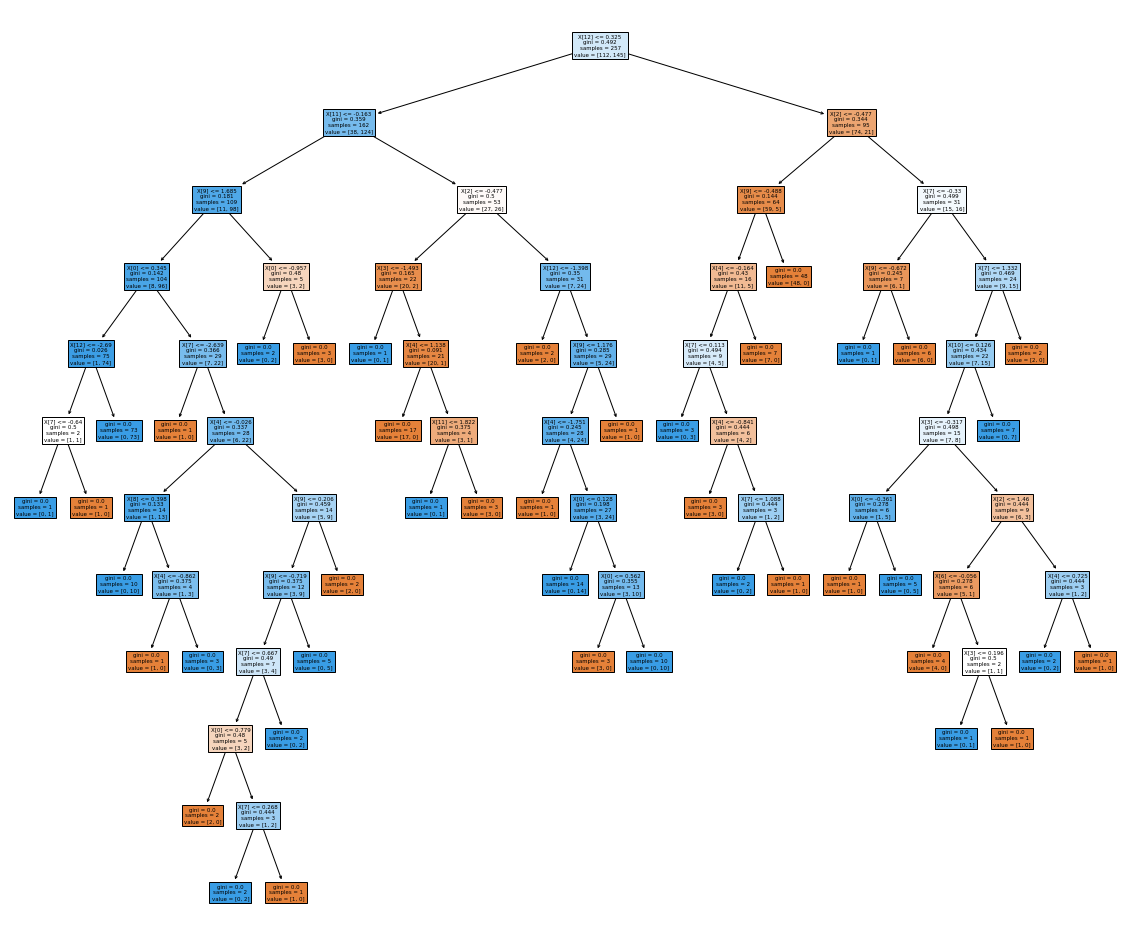

In [50]:
from sklearn import tree
plt.figure(figsize=(20,17))
tree.plot_tree(treemodel,filled=True)

In [51]:
y_pred=treemodel.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0], dtype=int64)

In [52]:
score=accuracy_score(y_pred,y_test)
score

0.6956521739130435

In [53]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71        22
           1       0.75      0.62      0.68        24

    accuracy                           0.70        46
   macro avg       0.70      0.70      0.70        46
weighted avg       0.70      0.70      0.69        46



Random forest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(x_train,y_train)
RandomForestClassifier(n_estimators=50)

RandomForestClassifier(n_estimators=50)

In [55]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0], dtype=int64)

In [56]:
score=accuracy_score(y_pred,y_test)
score

0.7608695652173914

In [57]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.80      0.70      0.74        23

    accuracy                           0.76        46
   macro avg       0.77      0.76      0.76        46
weighted avg       0.77      0.76      0.76        46



Bagging Classifier

In [58]:
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier(base_estimator=None,n_estimators=10,max_samples=1.0,max_features=1.0,bootstrap_features=False,oob_score=False)

In [59]:
BC.fit(x_train,y_train)
BaggingClassifier()

BaggingClassifier()

In [60]:
y_pred=BC.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [61]:
score=accuracy_score(y_pred,y_test)
score

0.6956521739130435

In [62]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.65      0.65      0.65        20

    accuracy                           0.70        46
   macro avg       0.69      0.69      0.69        46
weighted avg       0.70      0.70      0.70        46



Adaboost Classifier model

In [63]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(n_estimators=100,random_state=0)

In [64]:
classifier.fit(x_train,y_train)
AdaBoostClassifier(n_estimators=100,random_state=0)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [65]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [66]:
score=accuracy_score(y_pred,y_test)
score

0.7608695652173914

In [67]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.80      0.70      0.74        23

    accuracy                           0.76        46
   macro avg       0.77      0.76      0.76        46
weighted avg       0.77      0.76      0.76        46



Gradient Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=100,learning_rate=       1.0,max_depth=1,random_state=0)

In [69]:
classifier.fit(x_train,y_train)
GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [70]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [71]:
score=accuracy_score(y_pred,y_test)
score

0.8043478260869565

In [72]:
 print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.80      0.76      0.78        21

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.80      0.80      0.80        46



XGBoost Classifier

In [73]:
import sys
!{sys.executable} -m pip install xgboost


In [74]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0])

In [76]:
score=accuracy_score(y_pred,y_test)
score

0.7608695652173914